
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [109]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [110]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [111]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [112]:
# Consideramos solo estas dos columnas como relevantes para este problema
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

# Resolución del ejercicio 1:

Responder a la pregunta: ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?

Realizamos los siguientes pasos para responder esta pregunta:

Primero, eliminaremos del dataset filas que contengan valores no deseados de la columna sueldo (salary_monthly_NETO). Aquí usaremos dos criterios. El primero es considerar como outliers aquellos valores de sueldo que sean mayores al valor maxq, donde maxq = Q3+1.5*IQR. El segundo criterio es quedarnos con la subpoblación de sueldos que sean mayores a $25000, por considerar esta subpoblación más realista.

Segundo, seleccionaremos una subpoblación de lenguajes de programación, utilizando como criterio los lenguajes que cuenten con más de 1000 usuari@s en la presente encuesta.

Tercero, a cada lenguaje de programación elegido le calcularemos su distribución de sueldos, media y mediana. Con estas metricas y graficas construiremos la conclusión de lo analizado.


# 1°) Eliminación de valores extremos de salary_monthly_NETO y construcción de subpoblación de la misma.

Utilizando el criterio de considerar outliers aquellos datos mayores a maxq = Q3+1.5*IQR, eliminaremos filas de la columna 'salary_monthly_NETO'.

Además, tomaremos para nuestro futuro análisis la subpoblacion de sueldos mayores a $25000, por considerarla más acorde a la pregunta que buscamos responder.

In [113]:
salary_col='salary_monthly_NETO'

In [114]:
df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count       5883.00
mean       94907.95
std        96862.26
min            1.00
25%        51480.00
50%        78000.00
75%       106000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object

In [115]:
#Calculamos maxq, que luego lo usaremos para definir outliers
q3 = df['salary_monthly_NETO'].quantile(75/100) #(97 / 100) #q3=106000.00
q1 = df['salary_monthly_NETO'].quantile(25/100) #(97 / 100) #q1=51480.00
iqr = q3 - q1
maxq= q3+1.5*iqr
print(maxq)
#otro criterio
q95 = df['salary_monthly_NETO'].quantile(95 / 100)
print(q95)

187780.0
210000.0


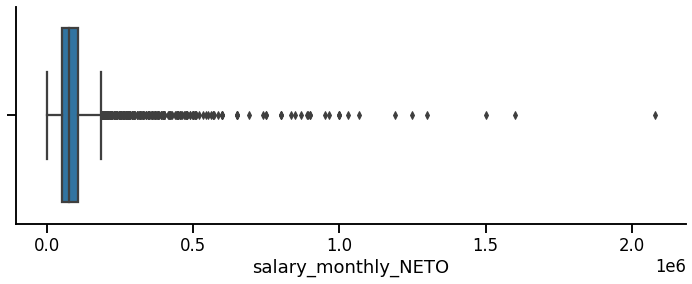

In [116]:
#visualizamos maxq y los puntos a tirar:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[salary_col])
seaborn.despine()

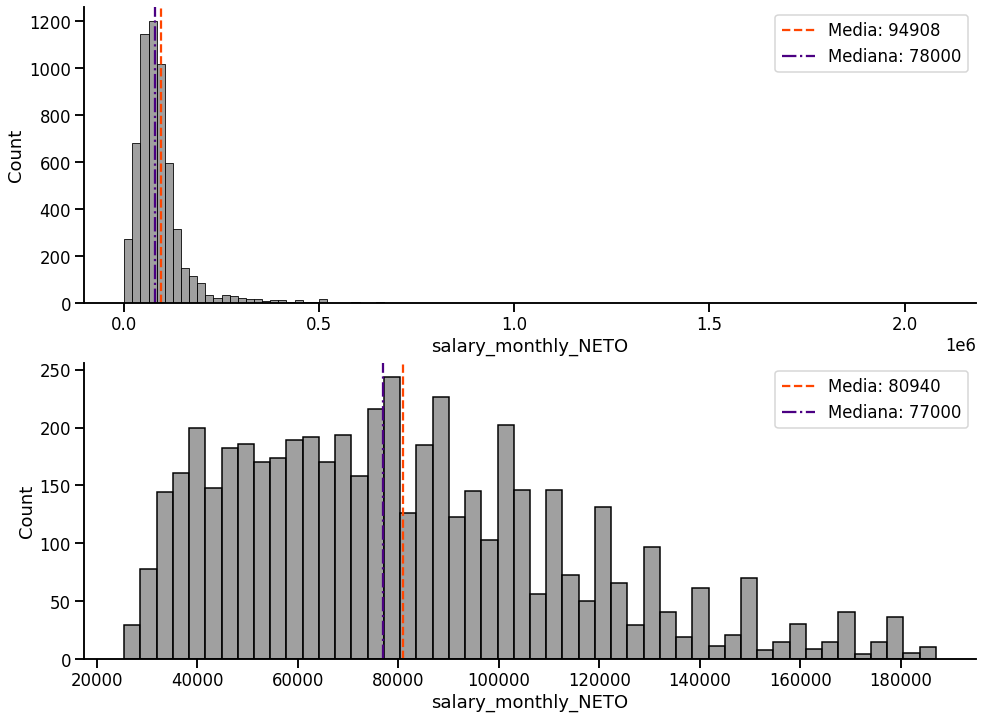

In [117]:
# construccion del dataset filtrado (excluyendo outliers) y comparacion con el original
# a traves de histogramas de distribucion, media y mediana
fig, axes = plt.subplots(nrows=2, figsize=(16, 12))
seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media: '+str('{:5.0f}'.format(df[salary_col].mean())))
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana: '+str('{:5.0f}'.format(df[salary_col].median())))

limite_inferior=25000
filtered_df = df.copy()
filtered_df = filtered_df[(limite_inferior< df[salary_col]) & (df[salary_col] < maxq)]
seaborn.histplot(filtered_df[salary_col], bins=50, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media: '+str('{:5.0f}'.format(filtered_df[salary_col].mean())))
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana: '+str('{:5.0f}'.format(filtered_df[salary_col].median())))

axes[0].legend()
axes[1].legend()
seaborn.despine()

In [118]:
#Comparamos las metricas del dataset original,
df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count       5883.00
mean       94907.95
std        96862.26
min            1.00
25%        51480.00
50%        78000.00
75%       106000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object

In [119]:
#con las del nuevo dataset:
filtered_df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count      5150.00
mean      80940.05
std       33792.81
min       25400.00
25%       54000.00
50%       77000.00
75%      100000.00
max      187000.00
Name: salary_monthly_NETO, dtype: object

Observamos que en total tiramos 5883 - 5150 = 733 filas, lo que corresponde a un 12% del total. Si bien este no es un porcentaje para nada despreciable, consideramos más adecuado quedarnos con esta subpoblación para hacer el análisis, aunque este análisis sea justamente condicional a una subpoblación.

Observamos también que la diferencia entre media y mediana se reduce producto de la eliminacion de valores extremos.

# 2°) Seleccionamos los lenguajes de programacion más usados por les encuestades.

Para ello haremos un conteo de frecuencias de los lenguajes de programación, y utilizaremos como criterio quedarnos con aquellos lenguajes con más de 1000 usuari@s.




La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.

In [120]:
filtered_df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

In [121]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
filtered_df.loc[:, 'cured_programming_languages'] = filtered_df\
    .tools_programming_languages.apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 
# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = filtered_df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(filtered_df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

/var/folders/g3/60y3stx94570x_f9zydtwpsm0000gn/T/ipykernel_54934/4082292315.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_lang = filtered_df.cured_programming_languages\


,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

### Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`, la cual es calculada por un ranking the lenguajes mas populares, para nuestro analisis aquellos con un minimo de 1000 usuarios 

In [122]:
#Rankeamos los diferentes lenguajes por frecuencia y limitamos por un minimo de usuaries
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})

# Excluimos los registros de aquellos lenguajes con menos del minimo de usuaries:
min_usuaries = 1000
interesting_languages = language_count['language'][language_count['frequency'] > min_usuaries ]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."


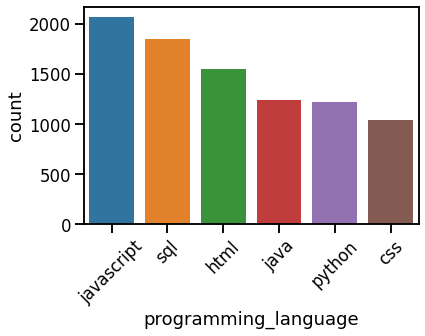

In [123]:
seaborn.countplot(data=filtered_df_lang, x='programming_language', order = filtered_df_lang['programming_language'].value_counts().index) 
plt.xticks(rotation=45);

# 3°) Métricas y gráficas para comparar los lenguajes elegidos.

Calculamos distribucion, boxplots, medianas e histogramas


In [124]:
#medianas:
pd=filtered_df_lang.groupby('programming_language').median().salary_monthly_NETO
pd.sort_values(ascending=False)

programming_language
python        85051.655
java          85000.000
javascript    78000.000
sql           77000.000
html          73000.000
css           72100.000
Name: salary_monthly_NETO, dtype: float64

In [125]:
#media:
pd=filtered_df_lang.groupby('programming_language').mean().salary_monthly_NETO
pd.sort_values(ascending=False)

programming_language
python        88983.276297
java          88246.814823
javascript    81205.401987
sql           80574.623576
html          78093.666079
css           77884.007327
Name: salary_monthly_NETO, dtype: float64

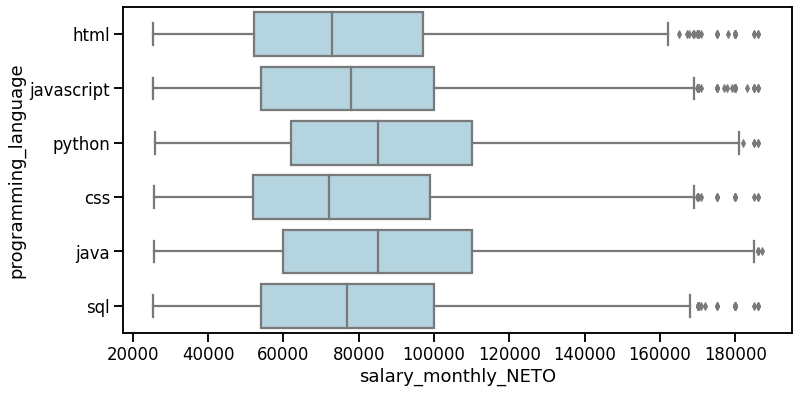

In [126]:
#boxplots: 

plt.figure(figsize=(12, 6))
seaborn.boxplot(data=filtered_df_lang, x='salary_monthly_NETO', y='programming_language',
                color='lightblue')
plt.ticklabel_format(style='plain', axis='x')

## Conclusiones

El analisis final nos arroja que si bien, no existen marcadas diferencias entre los salarios percibidos por l@s programadores segun el lenguaje de programacion al cual se dedican (cualquiera de los IQRs analizados contiene a cualquiera de las medianas analizadas), podemos establecer que aquellos dedicados total o parcialmente a lenguajes como Python o Java son l@s ligeramente mejor remunerad@s.

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

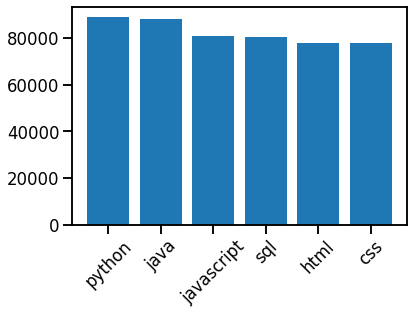

In [127]:
# A traves de un grafico de barras ordenado podemos identificar rapidamente 
# la organizacion de nuestros datos categoricos cuando los asociamos a valores numericos
medias_lenguajes=filtered_df_lang.groupby('programming_language').mean().salary_monthly_NETO

medias_lenguajes = medias_lenguajes \
    .reset_index()\
    .rename(columns={'salary_monthly_NETO': 'media'}) \
    .sort_values(by='media', ascending=False)
y_pos = np.arange(len(medias_lenguajes))
plt.bar(y_pos, medias_lenguajes['media'])
plt.xticks(y_pos, medias_lenguajes['programming_language'], rotation=45)
plt.show()


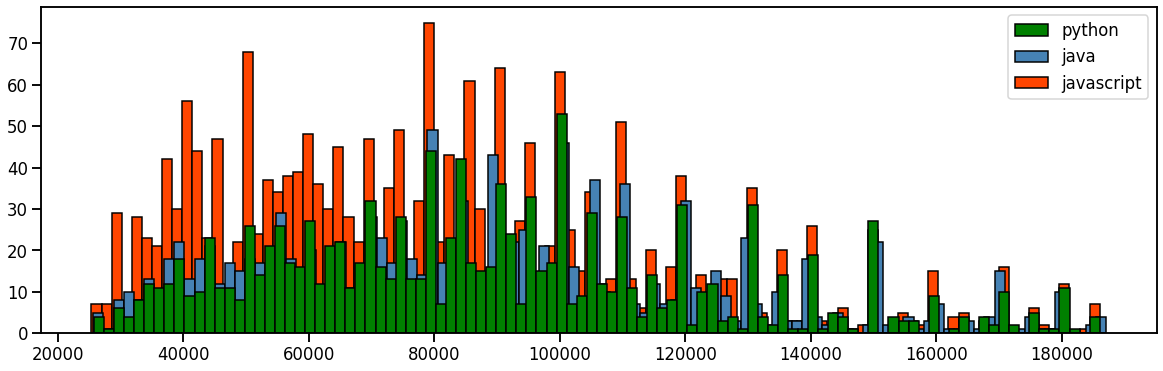

In [128]:
# Tambien a traves de histogramas superpuestos podemos realizar comparaciones de distribuciones 
# que nos permitan elaborar rapidamente hipostesis
plt.figure(figsize=(20, 6))
lenguajes = ['python', 'java', 'javascript']
color_lenguaje = ['green', 'steelblue', 'orangered']
plt.hist(data=filtered_df_lang[filtered_df_lang.programming_language.isin([lenguajes[2]])].sort_values(by=['salary_monthly_NETO']), x=salary_col,
                color=color_lenguaje[2],bins=100,edgecolor="black")
plt.hist(data=filtered_df_lang[filtered_df_lang.programming_language.isin([lenguajes[1]])].sort_values(by=['salary_monthly_NETO']), x=salary_col,
                color=color_lenguaje[1],bins=100,edgecolor="black")
plt.hist(data=filtered_df_lang[filtered_df_lang.programming_language.isin([lenguajes[0]])].sort_values(by=['salary_monthly_NETO']), x=salary_col,
                color=color_lenguaje[0],bins=100,edgecolor="black")
plt.ticklabel_format(style='plain', axis='x')

from matplotlib.patches import Rectangle
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in color_lenguaje]
plt.legend(handles,lenguajes)

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




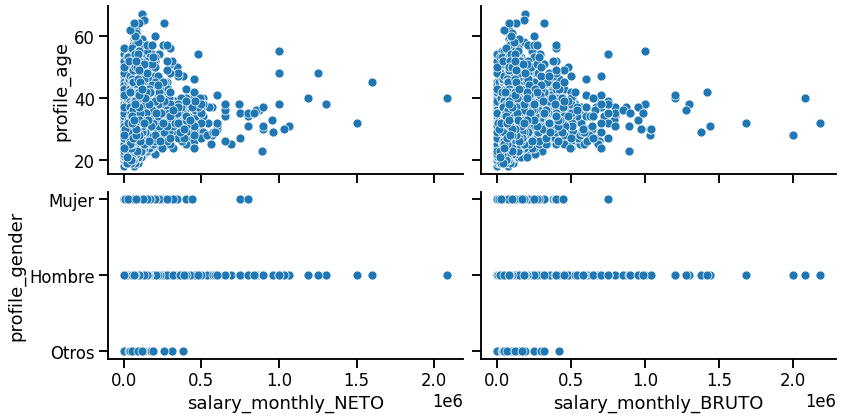

In [129]:
# Realizamos una visualizacion de tipo pairplot para observar correlaciones entre salario, 
# tanto bruto como neto en contraste con dos variables categoricas

# limitamos el dataframe a edades menores a 100 para elminar datos que consideramos mal cargados
# y destruyen la escala de visualiacion
seaborn.pairplot(data=df[df.profile_age < 100],
                 y_vars=['profile_age', 'profile_gender'],
                 x_vars=['salary_monthly_NETO', 'salary_monthly_BRUTO'],
                 aspect=2, height=3)

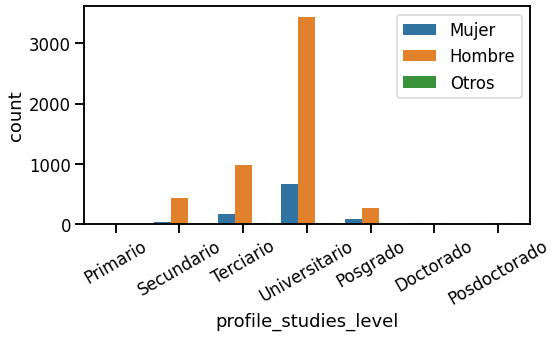

In [130]:
# tambien podemos realizar una correlacion de dos variables categoricas (genero y nivel de estudios) 
# para comparar su distribucion a traves de un countplot multivariable
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado']
fig = plt.figure(figsize=(8,4))
seaborn.countplot(x=df.profile_studies_level,  hue=df.profile_gender, order=sorted_studies_levels)
plt.xticks(rotation=30)
plt.legend(loc='upper right')


## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



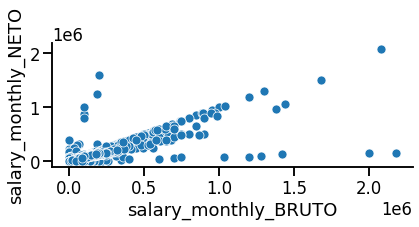

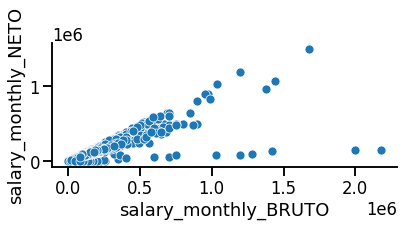

In [131]:
# Podemos utilizar el pairplot para entender posibles outliers correspondientes a datos incorrectos
# asumiendo que el salario bruto deberia ser siempre menor al bruto,
seaborn.pairplot(data=df[df.profile_age < 100],
                 y_vars=['salary_monthly_NETO'],
                 x_vars=['salary_monthly_BRUTO'],
                 aspect=2, height=3)
# que en el caso particular del grafico son los puntos arriba de la recta con pendiente 1
# y podemos eliminarlos con la siguiente condicion sin necesidad de eliminar la columna
seaborn.pairplot(data=df[df.salary_monthly_NETO<df.salary_monthly_BRUTO],
                 y_vars=['salary_monthly_NETO'],
                 x_vars=['salary_monthly_BRUTO'],
                 aspect=2, height=3)

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






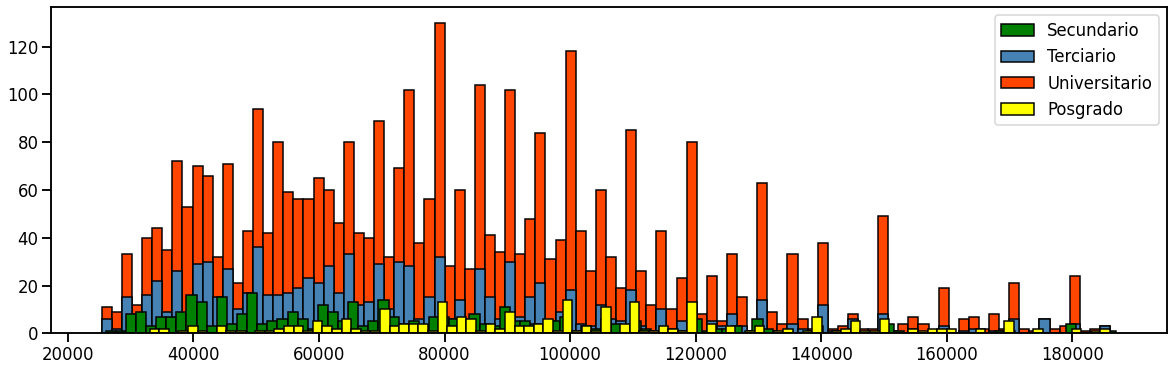

In [132]:
# para realizar una analisis de salarios vs una variable categorica con pocas opciones,
# podemos optar nuevamente por un histograma conjunto
# tomamos las subpoblaciones mas frecuente visualizadas en el inciso a
plt.figure(figsize=(20, 6))
sorted_studies_levels = ['Secundario', 'Terciario', 'Universitario', 'Posgrado']
color_study_level = ['green', 'steelblue', 'orangered', 'yellow']

plt.hist(data=filtered_df[filtered_df.profile_studies_level.isin([sorted_studies_levels[2]])].sort_values(by=['salary_monthly_NETO']), x=salary_col,
                color=color_study_level[2],bins=100,edgecolor="black")
plt.hist(data=filtered_df[filtered_df.profile_studies_level.isin([sorted_studies_levels[1]])].sort_values(by=['salary_monthly_NETO']), x=salary_col,
                color=color_study_level[1],bins=100,edgecolor="black")
plt.hist(data=filtered_df[filtered_df.profile_studies_level.isin([sorted_studies_levels[0]])].sort_values(by=['salary_monthly_NETO']), x=salary_col,
                color=color_study_level[0],bins=100,edgecolor="black")
plt.hist(data=filtered_df[filtered_df.profile_studies_level.isin([sorted_studies_levels[3]])].sort_values(by=['salary_monthly_NETO']), x=salary_col,
                color=color_study_level[3],bins=100,edgecolor="black")
plt.ticklabel_format(style='plain', axis='x')

from matplotlib.patches import Rectangle
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in color_study_level]
plt.legend(handles,sorted_studies_levels)

Se puede apreciar una mayor remuneracion para aquell@s con nivel de estudio Posgrado. Para el resto, a simple vista no existen marcadas diferencias. Sin embargo al analizar los datos de forma mas numerica podemos concluir que existe una relacion a mayor nivel de estudio mayor ingresos como se muestra a continuacion 

In [158]:
filtered_df_estudio = df[df.profile_studies_level.isin(sorted_studies_levels)]
filtered_df_estudio.groupby('profile_studies_level').median().salary_monthly_NETO.sort_values(ascending=False)

profile_studies_level
Posgrado         100000.0
Universitario     80000.0
Terciario         68000.0
Secundario        65000.0
Name: salary_monthly_NETO, dtype: float64

In [159]:
filtered_df_estudio.groupby('profile_studies_level')['salary_monthly_NETO'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
profile_studies_level,,,,,,,,
Terciario,1106.0,80814.433784,73045.051749,1.0,46000.0,68000.0,93000.0,1000000.0
Secundario,434.0,82686.351857,89015.514211,1.0,42250.0,65000.0,93000.0,1250000.0
Universitario,3991.0,97410.224414,99056.902960,1.0,53220.0,80000.0,108000.0,2080000.0
Posgrado,317.0,124166.795300,110533.626251,2.0,76000.0,100000.0,143175.0,1190000.0


## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


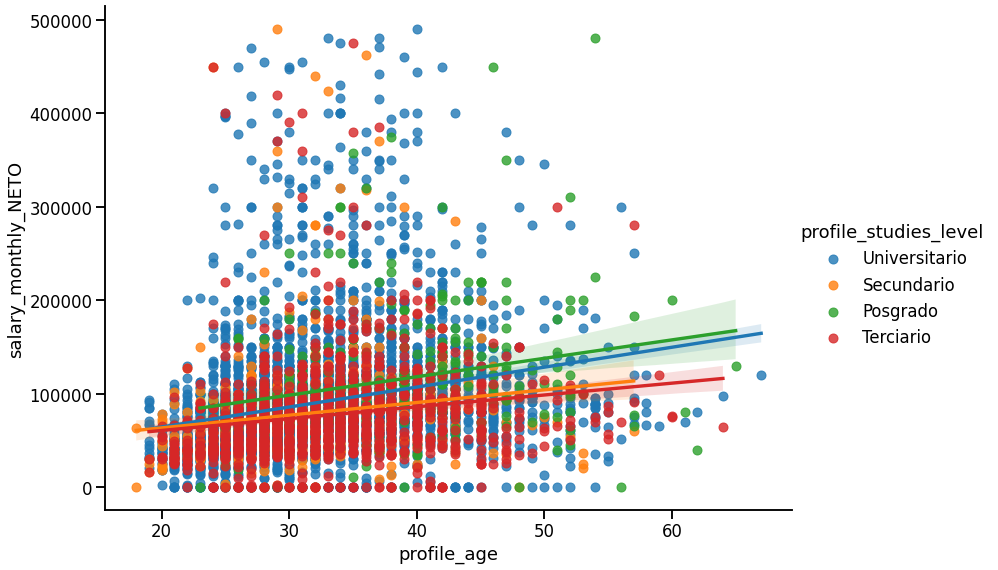

In [162]:
# usamos scatterplot para visualizar grandes volumenes de datos con gran dispersion
max_age = 70
max_salary = 500000
filtered_df_estudio = filtered_df_estudio[filtered_df_estudio.profile_age < max_age]
filtered_df_estudio = filtered_df_estudio[filtered_df_estudio.salary_monthly_NETO < max_salary]
seaborn.lmplot(x='profile_age', y="salary_monthly_NETO", hue='profile_studies_level', height=8.27, aspect=11.7/8.27, data=filtered_df_estudio )


Vemos que este gráfico no nos permite generar, conclusiones contundentes de los datos a pesar de la gran dispersion de los mismos. Que se condice con el analisis numerico realizado anteriormente, donde a mayor nivel de estudio existe un aumento en el ingreso.